<a href="https://colab.research.google.com/github/MarcoAfB/Prevendo_Sucesso_de_Start_Ups/blob/main/KickStarters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicialização do Projeto:

O projeto irá buscar analisar e melhor prever o futuro de uma start-up, se baseando nos (dados disponibilizados em https://www.kaggle.com/datasets/thedevastator/most-kickstarter-campaigns-fail-here-s-why) dados coletados em Kicdsatarter que segundo eles são: "As campanhas do Kickstarter transformam ideias em realidade. É onde os criadores compartilham novas visões para o trabalho criativo com as comunidades que se reunirão para financiá-los".

## Objetivo:

Com base nos dados disponíveis criaremos uma algorítimo que possa prever o futuro de uma start up.


---






In [ ]:
!pip install miceforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importando as livrarias necessárias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import miceforest as mf
import statistics as st

## LOAD THE DATA

In [ ]:
# Obtendo os dados
data = pd.read_csv('/content/kickstarter_data_full.csv', low_memory=False)

# Iremos manter apenas as colunas informadas na descrição do dataset
data = data[['id', 'photo', 'name', 'blurb', 'goal',
       'pledged', 'state', 'slug', 'disable_communication', 'country',
       'currency', 'currency_symbol', 'currency_trailing_code', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'backers_count', 'static_usd_rate', 'usd_pledged', 'creator',
       'location', 'category', 'profile', 'spotlight', 'urls', 'source_url']]

## ENTENDENDO O DATA SET

In [ ]:
# Quntia de colunas e fileiras no data set
print(data.shape)

(20632, 28)


In [ ]:
# Mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)
# Mostrar até 100 palavras dos strings
pd.options.display.max_colwidth = 100
data.head()

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,creator,location,category,profile,spotlight,urls,source_url
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011/959/953/4e53aa51f82e9764b135307761da1cde_original...",Auntie Di's Music Time Sign ASL for Hearing and HOH Children,MTS ASL Curriculum Workbook is a reproducible study book to build Early Literacy and Academic sk...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and-hoh,False,US,USD,$,True,2015-01-23 10:35:00,2015-01-23 10:35:00,2014-11-29 22:55:57,2014-12-17 13:47:36,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/1469579873""},""api"":{""user"":""https://...","{""country"":""US"",""urls"":{""web"":{""discover"":""https://www.kickstarter.com/discover/places/san-ferna...",Academic,"{""background_image_opacity"":0.8,""should_show_feature_image_section"":true,""link_text_color"":null,...",False,"{""web"":{""project"":""https://www.kickstarter.com/projects/1469579873/auntie-dis-music-time-sign-as...",https://www.kickstarter.com/discover/categories/publishing/academic?ref=category_modal&sort=magic
1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012/043/791/0b63de0aa160746c6f26a0eed0ae6828_original...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly grasp, and how to make sure your child's fine mot...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,USD,$,True,2015-05-01 16:13:22,2015-05-01 16:13:24,2015-02-20 09:28:43,2015-03-02 16:13:22,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/469955675""},""api"":{""user"":""https://a...","{""country"":""US"",""urls"":{""web"":{""discover"":""https://www.kickstarter.com/discover/places/greenwood...",Academic,"{""background_image_opacity"":0.8,""should_show_feature_image_section"":true,""link_text_color"":null,...",False,"{""web"":{""project"":""https://www.kickstarter.com/projects/469955675/jump-start-kindergarten-toolki...",https://www.kickstarter.com/discover/categories/publishing/academic?ref=category_modal&sort=magic
2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012/012/056/c566aeb9b51df01e8dd2828ce97d753f_original...",Ojukwu Balewa Awolowo (O.B.A.) Public Library Of Nigeria,"Establishing a free, world-class, public library which will be a center for curating and dissem...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-nigeri,False,US,USD,$,True,2015-03-26 08:17:04,2015-03-26 08:17:05,2015-01-24 00:08:06,2015-01-25 08:17:04,False,5,1.000000,120.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/843612324""},""api"":{""user"":""https://a...","{""country"":""NG"",""urls"":{""web"":{""discover"":""https://www.kickstarter.com/discover/places/lagos-ng""...",Academic,"{""background_image_opacity"":0.8,""should_show_feature_image_section"":true,""link_text_color"":null,...",False,"{""web"":{""project"":""https://www.kickstarter.com/projects/843612324/ojukwu-balewa-awolowo-oba-publ...",https://www.kickstarter.com/discover/categories/publishing/academic?ref=category_modal&sort=magic
3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011/860/879/620804a20f84c31d4f53a80313635842_original...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English language/dictionary.\nReason: The beauty of the En...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,USD,$,True,2014-10-06 00:41:17,2014-10-06 00:41:17,2014-09-05 22:30:00,2014-09-06 00:41:17,False,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/926977749""},""api"":{""user"":""https://a...","{""country"":""US"",""urls"":{""web"":{""discover"":""https://www.kickstarter.com/discover/places/branson-m

In [ ]:
# Coletando informações do tipos dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      20632 non-null  int64  
 1   photo                   20632 non-null  object 
 2   name                    20632 non-null  object 
 3   blurb                   20627 non-null  object 
 4   goal                    20632 non-null  float64
 5   pledged                 20632 non-null  float64
 6   state                   20632 non-null  object 
 7   slug                    20632 non-null  object 
 8   disable_communication   20632 non-null  bool   
 9   country                 20632 non-null  object 
 10  currency                20632 non-null  object 
 11  currency_symbol         20632 non-null  object 
 12  currency_trailing_code  20632 non-null  bool   
 13  deadline                20632 non-null  object 
 14  state_changed_at        20632 non-null

In [ ]:
# Variavel que buscaremos prever
data['state'].value_counts()

failed        11416
successful     6018
canceled       2460
live            508
suspended       230
Name: state, dtype: int64

# DATA PREPROCESSING

### Transformando as Variáveis

Deletaremos a classe 'live' da variável, pois ainda não houve a resposta. Poderemos usar ao final como a parte "prática" do projeto, mas agora não nos será útil, e para as restantes iremos tratar como 'failed'.

In [ ]:
# Deletando os dados em live
live_data = data[data.state == 'live']
data.drop(live_data.index, axis=0, inplace=True)

# Transformando as strings em valores (sucessful = 1, as demais = 0)
data['state'] = np.where(data['state'] == 'successful', 1, 0)

# Arrumando o indice, pois deletamos alguns rows
data.reset_index(inplace=True)

In [ ]:
# Iremos salavar o 'country' em uma variavel
country = data['country']
# Iremos salavar o 'currency' em uma variavel
currency = data['currency']
# Iremos salavar o 'currency' em uma variavel
category = data['category']

In [ ]:
# Transformando os bool em int (True = 1, False = 0)
data[['disable_communication',	'currency_trailing_code',	'staff_pick']] = np.where(
    data[['disable_communication',	'currency_trailing_code','staff_pick']] == True, 1, 0)

Deveremos criar uma cópia do data set, pois não podemos modificar os missing values usando one-hot encode, como sera feito no original, ao invés, iremos utilizar o 'label encode' que irá transformar as categorias strings em números, esse método não é bom ser usado para o machine learning, pois ele irá levar isso como um ranking, sendo 1<2<3<4<5... quando, na verdade não há relação de ranking entre essas variáveis. (caso houvesse, usar esse método não teria problemas)

In [ ]:
# Criando a copia do data set original
data_copy = data.copy()

# Transformando as categorical strings em columns 
data_copy = pd.get_dummies(data_copy, columns = ['country', 'currency'])

# Excluindo uma coluna que é criada automaticamente com o uso da função '.copy()'
data_copy.drop('index', axis=1, inplace=True)

In [ ]:
# Tecnica chamada one-hot code, iremos transformar as categorias strings em colunas
data = pd.get_dummies(data, columns = ['country', 'currency', 'category'],
                      dummy_na=True)

## Missing Values

Para missing values há 3 tipos, missing completely at random (mcat), quando o missing value não tem ligação com os parâmetros observados e os que não foram observados (não estão no dataset). Já o missing at Random (mat) tem relação com dados observados e não com os dados que não foram observados e por último o, missing not at random (mnar) tem ligação apenas com os dados não observados

In [ ]:
# Vendo as variaveis com missing values
for i in data.isnull().sum().index:
    if data.isnull().sum().loc[i] > 1:
        print(i, data.isnull().sum().loc[i])

blurb 5
location 45


Iremos começar por category

In [ ]:
# Salvando as categorical string da coluna 'category' em uma variavel
par_category = data_copy['category'].value_counts().index

# Iremos usar 'label encoding' em 'category'
data_copy['category'] = data_copy['category'].replace(
    par_category, range(
        len(data_copy['category'].value_counts().index)))

# Analisando os missing values
data_copy['category'][118:130]

118    16.0
119    16.0
120     NaN
121     NaN
122     NaN
123     NaN
124     NaN
125     NaN
126     NaN
127     NaN
128     NaN
129     NaN
Name: category, dtype: float64

Ao analisar 'category' podemos perceber um padrão nas classificações e para os missing values não parece ser diferente. Iremos então criar uma função para podermos identificar se há realmente padrões nos missing values

In [ ]:
def Nulls(data):

    # Criando uma lista contendo os indices dos valores nullos
    ind = list(data[data['category_nan'] == 1].index)

    # lista com o indice que começam e terminam os nulls
    null_index = []

    # O loop irá salvar madanças que ocorreram no valor index
    for i in range(len(ind)):
        if ind[i] != ind[i-1] + 1:
            
            null_index.append(ind[i-1])
            null_index.append(ind[i])

    # A primeira mudança é do ultimo para o primeiro, por isso sort
    null_index = sorted(null_index)

    # Colocar os dados em um dataframe
    null_index = pd.DataFrame([null_index[0::2],
                               null_index[1::2]], 
                               index=['Começa', 'Termina'])

    return null_index

# Chamar a função
null_index = Nulls(data)

# visualizando os ranges de nulls
null_index

,0,1,2,3,4,5,6
Começa,120,298,538,1178,8278,8412,17973
Termina,279,437,577,1212,8371,8581,19179


In [ ]:
# Iremos criar um loop para verificar se os ranges estão realmente com null values
for i in null_index:
  # Variavel contendo o inicio dos valores null
  inicio = null_index[i]['Começa']

  # Onde é encontrado o ultimo valor, -1 para tirar o zero contabilizado
  fim = null_index[i]['Termina']-1
  missing = data['category_nan'][inicio:fim].value_counts()
  print(f'De {fim-inicio}, {missing} são missing values')
  

De 158, 1    158
Name: category_nan, dtype: int64 são missing values
De 138, 1    138
Name: category_nan, dtype: int64 são missing values
De 38, 1    38
Name: category_nan, dtype: int64 são missing values
De 33, 1    33
Name: category_nan, dtype: int64 são missing values
De 92, 1    92
Name: category_nan, dtype: int64 são missing values
De 168, 1    168
Name: category_nan, dtype: int64 são missing values
De 1205, 1    1205
Name: category_nan, dtype: int64 são missing values


Com tais ranges podemos supor com grande grau de confiança que esses valores não estão ausentes por acaso. Resta saber se o motivo de estarem faltando tem alguma relação com alguma variável disponível no data set.

Iremos fazer um teste de hipótese para podermos ter o conhecimento se os valores que estão faltando, tem alguma relação com os parâmetros observados. Para isso iremos utilizar o t-test, que serve para testar vários tipos de hipótese. Sendo a equação do teste:

t=r√n−2/√1−r^2

r = correlação n = número de dados

O que definirá se rejeitamos a hipótese H0 (hipótese nulla, não correlação, H = 0) será um valor definido pelo df (Degrees of distribution) que é basicamente o número de variáveis que podem variar, (digamos que temos um dataset com apenas um valor faltando, porém, sabemos a média de todo dataset, assim saberemos também o valor que falta). Como são 1846 dados o df sera 1844, pois em correlação os dados são pareados, podendo assim 1844 valores variarem que não afetaram os resultados.

Para valores acima de 1000 os limites para o t distribution ficam muito parecido com o z distribution, para termos uma variação de 95% do H0 que é 0 (sem correlação), t precisa ser maior que 1.96. Dessa forma mostraremos que esse tipo de variação não é normal, e esperado, rejeitando então, a hipótese de que não há relação entre as variáveis



In [ ]:
# Podemos perceber a correlação dos missing com outras variaveis
missing_corr = data.corr()
missing_cor = missing_corr['category_nan'].sort_values()[0:-4]

# t-test para ver se a correlação entre os variaveis são significantes
for i in range(2):

    t_test = missing_cor[i-1]*np.sqrt(1844)/np.sqrt(1-(missing_cor[i-1])**2)
    print(f'Para a {i-1} variavel o t_test é', t_test)


Para a -1 variavel o t_test é 5.045133814971601
Para a 0 variavel o t_test é -6.0674877353856695


Com isso classificamos os missing values como missing at random, já que ele possui uma dependência comprovada com pelo menos uma variável observada.

Existem vários métodos de lidar com os missing values, porem os mais simples geralmente introduzem bias para o modelo, como apenas deletar as colunas com valores faltando, dessa forma é introduzido select bias, pois se há algum real motivo para o valor está faltando e à sua deleção estamos tirando essa informação da amostra(esse metodo funciona caso os valores são missing completely at random (mcat))

Então o método que será utilizado será o multiple imputation.

In [ ]:
# Criar 100, dataset, onde os valores missing são preenchidos diferentemente
data_multiple = mf.ImputationKernel(data_copy.select_dtypes([int,'uint8',float]),
                                    100, save_all_iterations=True, random_state=1)

# Variavel contendo a moda dos valores em 'category'
moda_category = pd.concat([
                data_multiple.complete_data(i) for i in range(100)]).groupby(
                level=0)['category'].agg(st.mode)

# Inserindo a variavel no dataframe
data_copy['category'] = moda_category

In [ ]:
# Revertendo 'category' de categoria int para categoria string
data_copy['category'] = data_copy['category'].replace(
    data_copy['category'].value_counts().index,
    par_category)

# Vendo as variaveis com missing values
for i in data.isnull().sum().index:
    if data.isnull().sum().loc[i] > 1:
        print(i, data.isnull().sum().loc[i])

blurb 5
location 45


In [ ]:
# Iremos transformar as categorias strings em colunas
data_copy = pd.get_dummies(data_copy, columns = ['category'])

As outras duas variáves com missing values não serão usadas

## Selecionando os features

In [ ]:
# Excluindo colunas que não serão utilizadas
data_copy.drop(['id', 'photo','urls', 'source_url', 'blurb',
    'profile','location', 'creator', 'currency_symbol', 'pledged',
    'static_usd_rate'],axis=1, inplace=True)

data_copy = data_copy.select_dtypes([int, float, bool, 'uint8'])

In [ ]:
data_copy

,goal,state,disable_communication,currency_trailing_code,staff_pick,backers_count,usd_pledged,spotlight,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,category_Academic,category_Apps,category_Blues,category_Comedy,category_Experimental,category_Festivals,category_Flight,category_Gadgets,category_Hardware,category_Immersive,category_Makerspaces,category_Musical,category_Places,category_Plays,category_Restaurants,category_Robots,category_Shorts,category_Software,category_Sound,category_Spaces,category_Thrillers,category_Wearables,category_Web,category_Webseries
0,1500.0,0,0,1,0,0,0.000000,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,500.0,0,0,1,0,0,0.000000,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100000.0,0,0,1,0,5,120.000000,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5000.0,0,0,1,0,0,0.000000,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3222.0,0,0,0,0,17,396.802395,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20119,32500.0,0,0,0,0,173,25886.197879,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20120,100000.0,0,0,0,0,13,1644.428040,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20121,10000.0,0,0,1,0,0,0.000000,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20122,2500.0,0,0,1,0,0,0.000000,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# EDA

Aqui iremos analisar os dados depois de já termos os processado. Poderemos visualizar se há necessidade de mais algum tratamento, e também iremos tirar algumas conclusões sobre eles

In [ ]:
# Analisando a correlação das variaveis com a variavel de interesse
corr = data_copy.corr()
corr['state'].sort_values()

category_Web            -0.174780
category_Software       -0.127414
disable_communication   -0.070231
currency_EUR            -0.068294
currency_AUD            -0.052236
                           ...   
backers_count            0.194228
usd_pledged              0.232634
staff_pick               0.346628
state                    1.000000
spotlight                1.000000
Name: state, Length: 66, dtype: float64

Iremos plotar a distribuição com histograma das únicas duas variáveis continuas do data-set

(array([8.129e+03, 3.109e+03, 2.103e+03, 1.216e+03, 5.210e+02, 1.404e+03,
        3.770e+02, 3.920e+02, 2.490e+02, 1.430e+02, 7.820e+02, 3.800e+01,
        1.710e+02, 4.100e+01, 2.600e+01, 2.480e+02, 2.700e+01, 4.100e+01,
        2.900e+01, 2.700e+01, 1.710e+02, 1.100e+01, 2.400e+01, 9.000e+00,
        1.200e+01, 1.800e+02, 6.000e+00, 9.000e+00, 1.000e+01]),
 array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
         80000,  90000, 100000, 110000, 120000, 130000, 140000, 150000,
        160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000,
        240000, 250000, 260000, 270000, 280000, 290000]),
 <a list of 29 Patch objects>)

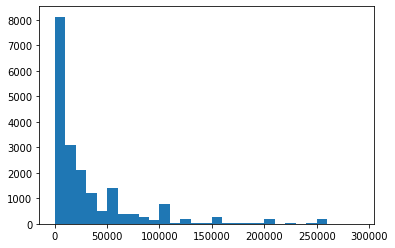

In [ ]:
# Plotando o histograma da variavel 'goal'
plt.hist(x=data_copy['goal'], bins=range(0,300000,10000))

(array([1.6053e+04, 1.3040e+03, 5.9800e+02, 3.7600e+02, 2.2200e+02,
        2.2000e+02, 1.4900e+02, 1.2600e+02, 8.8000e+01, 8.0000e+01,
        1.1600e+02, 7.4000e+01, 6.4000e+01, 3.4000e+01, 3.2000e+01,
        4.7000e+01, 4.0000e+01, 3.3000e+01, 2.6000e+01, 2.7000e+01,
        2.4000e+01, 1.8000e+01, 1.5000e+01, 1.7000e+01, 9.0000e+00,
        1.5000e+01, 1.5000e+01, 1.1000e+01, 7.0000e+00]),
 array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
         80000,  90000, 100000, 110000, 120000, 130000, 140000, 150000,
        160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000,
        240000, 250000, 260000, 270000, 280000, 290000]),
 <a list of 29 Patch objects>)

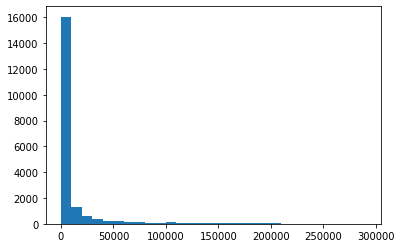

In [ ]:
# Plotando o histograma da variavel 'usd_pledged'
plt.hist(x=data_copy['usd_pledged'], bins=range(0,300000,10000))

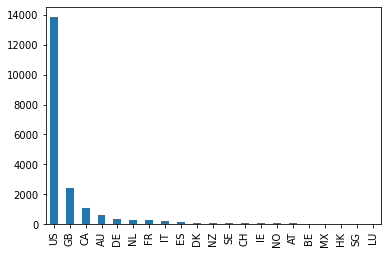

In [ ]:
# Plotando a distribuição da categoria 'country'
country.value_counts().plot(kind='bar')

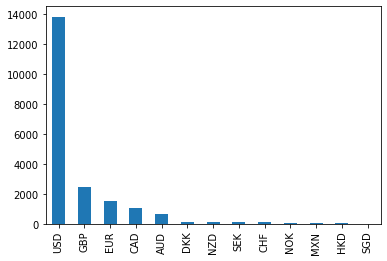

In [ ]:
# Plotando a distribuição da categoria 'currency'
currency.value_counts().plot(kind='bar')

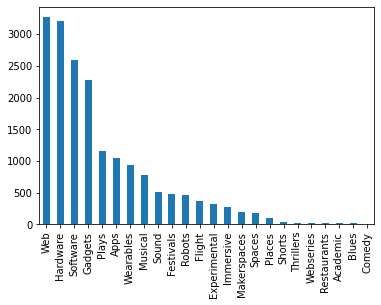

In [ ]:
# Plotando a distribuição da categoria 'category'
category.value_counts().plot(kind='bar')

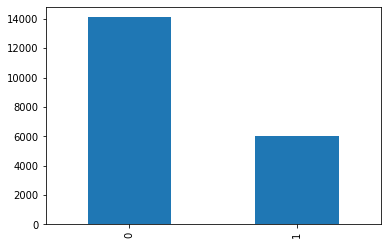

In [ ]:
# Plotando a distribuição da variavel resposta
data_copy['state'].value_counts().plot(kind='bar')

Com essa análise podemos perceber algumas coisas:

1- O data-set possui variáveis correlacionadas ao Y

2- Temos float dados que possuem grandes skews

3- As variáveis categóricas são bem desbalanceadas, porém isso não é um problema, seria caso essa característica fosse encontrada na variável de resposta Y, porém não é o que acontece.

4- Podemos perceber que a variável 'spotlight', é 100% relacionada com nossa variável de resposta, provavelmente é uma informação obtida só depois do ocorrido ter acontecido, dessa forma ela não nos interessa.

## Voltando ao Data Preprocessing

In [ ]:
# Deletando uma variavel vista com inválida
data_copy.drop('spotlight', axis=1, inplace=True)

Transformaremos todos os valores de 'goal' em log de base 10, dessa forma os deixamos gaussian tendo então algumas vantagens, a principal aqui é que alguns modelos de ML entendem melhor esse tipo de distribuição, pois seus cálculos consideram que irão encontrar esse tipo de distribuição.

quantia de valores menor ou igual a zero  0 



(array([  27.,   39.,  357., 2326., 5380., 8604., 2932.,  387.,   59.,
          13.]),
 array([ 0.        ,  1.84206807,  3.68413615,  5.52620422,  7.3682723 ,
         9.21034037, 11.05240845, 12.89447652, 14.7365446 , 16.57861267,
        18.42068074]),
 <a list of 10 Patch objects>)

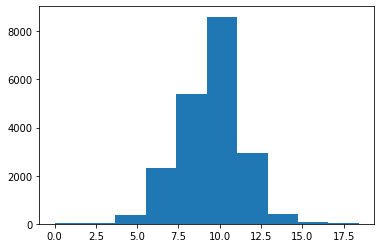

In [ ]:
# numero de zeros na variavel 'goal'
print('quantia de valores menor ou igual a zero ',(data_copy['goal']<=0).sum(),
      '\n')
# Transformando os dados 'goal'
data_copy['goal'] = np.log(data_copy['goal'])
plt.hist(data_copy['goal'])

A variável 'usd_pledged' possui valores com zero fazendo então que esse trabalho de normaliza-lo fique mais difícil, e sendo mais provável que introduzira bias para o parametro. E por conter valores zeros devomos usar outro método chamado Inverse hyperbolic sine ao invés do log

quantia de valores menor ou igual a zero  2806 



(array([3593.,  847., 1717., 2500., 3312., 3949., 2573., 1285.,  308.,
          40.]),
 array([ 0.        ,  1.63372882,  3.26745764,  4.90118646,  6.53491528,
         8.1686441 ,  9.80237292, 11.43610174, 13.06983056, 14.70355938,
        16.3372882 ]),
 <a list of 10 Patch objects>)

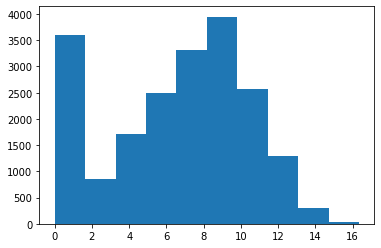

In [ ]:
# Salvando a variavel no formato padrão
usd_pledged_raw = data_copy['usd_pledged']

# numero de zeros na variavel 'goal'
print('quantia de valores menor ou igual a zero ',
      (data_copy['usd_pledged']<=0).sum(),
      '\n')
# Transformando os dados 'usd_pledged'
data_copy['usd_pledged'] = np.arcsinh(data_copy['usd_pledged'])
plt.hist(data_copy['usd_pledged'])

# PREPARANDO O MODELO
Testaremos dois modelos diferentes, Randomn Forest com a intenção de obtermos melhores previsões e Logistic Regression para termos um modelo mais simples e fácil de ser interpretado para podermos saber quais variaveis tem maior influência em determinar o sucesso de uma start-up.

## Random Forest 
Esse é um modelo mais flexível e recomendado o uso em data sets mais complexos e as variáveis não tenham uma correlação tão grande com Y, ou seja, não há uma correlação muito direta entre os dois(Não há problemas caso haja essa correlação porem nesse caso a escolha de uma algorítimo que assume existir essa correlação pode ser uma melhor escolha, pois 1 seu modelo é preparado, e adaptado para esse tipo de situação e 2 costuma ser modelos mais simples, sendo melhor escolher os menos complexos já que a chance de overfitting ("Decorar" os valores no treino, e como há variações no teste e em live performar bem a baixo do esperado)), outro motivo é sua interpretabilidade que se torno mais acessível.

Ele será treinado usando o cross-validation,  k-fold com k=10, ou seja, os dados primeiro serão "embaralhados" e então divididos em 10 parte mais iguais em quantia possível, 9 dessas partes serão usadas para treino e 1 para teste, sera feito isso k vezes havendo o teste em cada k, ao final é feito a média de cada k método (roc_ouc, MSE, etc). Há boas vantagens em se usar esse método ao invés de outros como separar 80% teste e 20% treino chamada validation, k-fold consegue aproveitar melhor seus dados para podermos ter o modelo melhor treinado, já que aproveitamos uma parte maior dos dados para treino, fazendo assim um modelo com menos bias. Há também um teste chamado Leave-one-out cross-validation, ou seja, dos n dados o modelo será treinado em n-1 e testado no, um restante, é então calculado a média do método da avaliação escolhido, o LOOCV tem um bias menor que k-fold, pois consegue aproveitar melhor ainda os dados, porem é extremamente custoso roda-lo devido seu grande número de treinos e testes (n vezes), e pode até ser impossível caso n seja muito grande, sua variação é também maior que k-fold poís a correlação entre os testes é enorme, já que os dados de cada treino são quase idênticos uns aos outros.
Então, considerando o bias-variance trade-off k-fold parece ser uma escolha mais apropriada.

Selecionaremos alguns parâmetros para colocar no modelo, podendo haver 384 combinações, devido ao custo que iria gerar treinar os 300 modelos sem contar o pior, overfitting, com 384 tentativas as chances de encontrar o modelo que funcionou por acaso, devido à sorte se torna grande. Por isso selecionaremos de forma randômica os parâmetros para colocar no modelo, testando 10 diferentes, dessa forma as chances de encontrar algo por pura chance diminui e ainda assim podemos escolher os parâmetros que melhor se adaptaram aos dados

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Nomeando o objeto do modelo
regressor = RandomForestClassifier()

# Criando a variável contendo todos os predictors
X = data_copy.drop('state', axis=1)
# Criando a variavel contendo a resposta
Y = data_copy['state']

# As configurações que serão usadas no modelo             
parametros = {'n_estimators':[10,25,50,100,150,200],
        'max_depth':list(range(4,20,2)),
         'max_features':list(range(4,20,2))}

# Declarando a função contendo o ambiente de trainos e testes
rnd_search = RandomizedSearchCV(regressor, parametros, n_iter =10, cv=10, scoring='roc_auc',
                               verbose=0, error_score='raise')

rnd_search.fit(X,Y)

print('parametros do melhor modelo ', rnd_search.best_score_)
print('resultado do teste do melhor modelo ', rnd_search.best_params_)

parametros do melhor modelo  0.9816030161243912
resultado do teste do melhor modelo  {'n_estimators': 200, 'max_features': 18, 'max_depth': 8}


## Logistic Regression
Diferente do random forest, logistic regression é um parametric aproach, ou seja, é um modelo que contem mais suposições sobre os dados como seu formato, sua distribuição e com isso é aplicado uma fórmula que condiz com essas suposições, logo o problema se torna estimar os coeficientes dassa formula ao invés de ter que achar um jeito que dado X poderá ser previsto Y, agora só temos que prever os coeficientes de X, assim o problema fica muito mais simples.
Os modelos parametric geralmente se dão melhor que os não parametric quando as suposições são atendidas ou os dados obtidos estão em pouca quantidades, já achar coeficientes é mais simples quando há poucas observações ela tem vantagem em cima de non parametric

No modelo será utilizado penalty='l1', dessa forma irá ser incentivado que os coeficientes tenham o menor valor possível, sendo possível até ser zero, dessa forma selecionaremos as variáveis que realmente são importantes, podendo diminuir o número de variáveis no modelo, assim diminuiremos a variação e aumentaremos a simplicidade e interpretabilidade do algorítimo

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# Declarando o dicionario que irá conter informações do modelo
model_avaliation = {}

# Iremos criar uma função para selecionar o melhor modelo
def selection(coef):

    # Declando k-fold com k=10
    cv = KFold(n_splits=10, random_state=1, shuffle=True)

    # Fazer um loop por cada coeficiente
    for i in range(len(coef)):
        # Declarando o modelo com o devido coeficente
        logi_model = LogisticRegression(C=coef[i], penalty='l1', solver='liblinear')

        # Testar o modelo no k-fold
        scores = cross_val_score(logi_model, X, Y, scoring='roc_auc',
                         cv=cv, n_jobs=-1)
        
        # Treinar o modelo para que possamos ter acesso às variaveis selecionadas
        logi_model.fit(X, Y)

        # Iremos armazenar o nome e coeficiente das variaveis 
        var_coef = pd.DataFrame()
        var_coef['var'] = logi_model.feature_names_in_
        var_coef['coef'] = logi_model.coef_[0]

        # Iremos colocar as informações em uma dicionário
        model_avaliation[i] = {'variables':var_coef[var_coef['coef'] > 0],
                        'score': np.mean(scores),
                        'n_variable': len(var_coef[var_coef['coef'] > 0]),
                        'coef': coef[i]}

    
    return logi_model

In [ ]:
modelos = selection([0.1, 0.05, 0.005, 0.01])

model_avaliation

{0: {'variables':                        var      coef
  2   currency_trailing_code  3.150464
  3               staff_pick  0.178674
  5              usd_pledged  4.144147
  12              country_DK  0.860971
  20              country_MX  0.868087
  24              country_SE  0.758420
  30            currency_DKK  1.101454
  34            currency_MXN  2.275826
  37            currency_SEK  0.454946
  41           category_Apps  0.235689
  45      category_Festivals  0.458329
  51        category_Musical  0.313218
  53          category_Plays  0.627419,
  'score': 0.9962322847522177,
  'n_variable': 13,
  'coef': 0.1},
 1: {'variables':                        var      coef
  2   currency_trailing_code  1.290522
  3               staff_pick  0.166244
  5              usd_pledged  3.730893
  51        category_Musical  0.097392
  53          category_Plays  0.395551,
  'score': 0.9952805060593688,
  'n_variable': 5,
  'coef': 0.05},
 2: {'variables':              var      coef
  4  ba

In [ ]:
model_avaliation[3]

{'variables':                       var      coef
 2  currency_trailing_code  0.092044
 4           backers_count  0.000018
 5             usd_pledged  2.867743,
 'score': 0.99302150110779,
 'n_variable': 3,
 'coef': 0.01}

O Logistic regression faz sua previsão com base em probabilidade será 1 caso ele prevê uma probabilidade > 0.5 e 0 caso contrario. Dessa forma se selecionar a constante = 0.01 teremos um modelo com 3 variáveis, sendo então a quantia de dólares adquirido pelo projeto o indicativo mais forte de que a start-up será um sucesso.
